In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

main_df = pd.read_csv("/Users/oliverclemence/Downloads/nfl_pass_rush_receive_raw_data.csv", header = 0)
main_df.drop(['player_id', 'Vegas_Line', 'Vegas_Favorite', 'Over_Under'], inplace=True, axis=1)
main_df

,game_id,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,...,home_team,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date
0,201909050chi,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
1,201909050chi,RB,Aaron Jones,GNB,0,0,0,0,0,0,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
2,201909050chi,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,0,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
3,201909050chi,WR,Davante Adams,GNB,0,0,0,0,0,0,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
4,201909050chi,TE,Jimmy Graham,GNB,0,0,0,0,0,0,...,CHI,10,3,False,outdoors,grass,65,69,10,2019-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,202202130cin,WR,Brandon Powell,LAR,0,0,0,0,0,0,...,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19969,202202130cin,RB,Buddy Howell,LAR,0,0,0,0,0,0,...,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19970,202202130cin,TE,Drew Sample,CIN,0,0,0,0,0,0,...,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13
19971,202202130cin,WR,Trent Taylor,CIN,0,0,0,0,0,0,...,CIN,23,20,False,dome,matrixturf,72,45,0,2022-02-13


In [3]:
main_df.describe()

,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,rush_att,...,rec_air_yds,rec_yac,rec_drops,offense,off_pct,vis_score,home_score,Temperature,Humidity,Wind_Speed
count,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,...,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000,19973.000000
mean,1.844240,2.860011,20.565513,0.131728,0.064988,0.192059,1.299354,3.401742,9.026606,2.179392,...,21.977875,9.532569,0.133731,32.708857,48.993691,23.221149,23.912382,62.909378,55.658990,5.836179
std,6.294815,9.659786,70.841227,0.550405,0.336662,0.789580,5.613713,11.543382,28.645285,4.739141,...,36.992115,15.184525,0.391542,21.951155,31.952697,10.265776,10.184923,15.283144,17.077761,5.986499
min,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,...,-32.900000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.000000,19.000000,16.000000,17.000000,52.000000,45.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,0.000000,31.000000,47.000000,23.000000,24.000000,72.000000,48.000000,5.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,31.200000,14.000000,0.000000,51.000000,78.000000,30.000000,31.000000,72.000000,68.000000,10.000000
max,47.000000,68.000000,525.000000,5.000000,5.000000,9.000000,79.000000,93.000000,158.300000,35.000000,...,320.600000,153.000000,6.000000,100.000000,100.000000,59.000000,56.000000,93.000000,100.000000,35.000000


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19973 entries, 0 to 19972
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pos                           19973 non-null  object 
 1   player                        19973 non-null  object 
 2   team                          19973 non-null  object 
 3   pass_cmp                      19973 non-null  int64  
 4   pass_att                      19973 non-null  int64  
 5   pass_yds                      19973 non-null  int64  
 6   pass_td                       19973 non-null  int64  
 7   pass_int                      19973 non-null  int64  
 8   pass_sacked                   19973 non-null  int64  
 9   pass_sacked_yds               19973 non-null  int64  
 10  pass_long                     19973 non-null  int64  
 11  pass_rating                   19973 non-null  float64
 12  rush_att                      19973 non-null  int64  
 13  r

In [5]:
main_df.shape

(19973, 64)

In [6]:
main_df.isnull().sum()

pos            0
player         0
team           0
pass_cmp       0
pass_att       0
              ..
Surface        0
Temperature    0
Humidity       0
Wind_Speed     0
game_date      0
Length: 64, dtype: int64

In [7]:
len(main_df.team.unique())

32

In [8]:
main_df['W_Team'] = (
    np.where(
        main_df['home_score'] > main_df['vis_score'], 
        main_df['home_team'], 
        np.where(main_df['home_score'] < main_df['vis_score'], main_df['vis_team'], 'Draw')
    )
)
main_df

,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,...,vis_score,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date,W_Team
0,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,37,...,10,3,False,outdoors,grass,65,69,10,2019-09-05,GNB
1,RB,Aaron Jones,GNB,0,0,0,0,0,0,0,...,10,3,False,outdoors,grass,65,69,10,2019-09-05,GNB
2,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,0,0,...,10,3,False,outdoors,grass,65,69,10,2019-09-05,GNB
3,WR,Davante Adams,GNB,0,0,0,0,0,0,0,...,10,3,False,outdoors,grass,65,69,10,2019-09-05,GNB
4,TE,Jimmy Graham,GNB,0,0,0,0,0,0,0,...,10,3,False,outdoors,grass,65,69,10,2019-09-05,GNB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,WR,Brandon Powell,LAR,0,0,0,0,0,0,0,...,23,20,False,dome,matrixturf,72,45,0,2022-02-13,LAR
19969,RB,Buddy Howell,LAR,0,0,0,0,0,0,0,...,23,20,False,dome,matrixturf,72,45,0,2022-02-13,LAR
19970,TE,Drew Sample,CIN,0,0,0,0,0,0,0,...,23,20,False,dome,matrixturf,72,45,0,2022-02-13,LAR
19971,WR,Trent Taylor,CIN,0,0,0,0,0,0,0,...,23,20,False,dome,matrixturf,72,45,0,2022-02-13,LAR


In [9]:
main_df['Win/Loss'] = (
    np.where(
        main_df['team'] == main_df['W_Team'], 
        1, 
        np.where(main_df['W_Team'] == 'Draw', 0.5 , 0)
    )
)
main_df

,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,...,home_score,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date,W_Team,Win/Loss
0,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,37,...,3,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0
1,RB,Aaron Jones,GNB,0,0,0,0,0,0,0,...,3,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0
2,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,0,0,...,3,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0
3,WR,Davante Adams,GNB,0,0,0,0,0,0,0,...,3,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0
4,TE,Jimmy Graham,GNB,0,0,0,0,0,0,0,...,3,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,WR,Brandon Powell,LAR,0,0,0,0,0,0,0,...,20,False,dome,matrixturf,72,45,0,2022-02-13,LAR,1.0
19969,RB,Buddy Howell,LAR,0,0,0,0,0,0,0,...,20,False,dome,matrixturf,72,45,0,2022-02-13,LAR,1.0
19970,TE,Drew Sample,CIN,0,0,0,0,0,0,0,...,20,False,dome,matrixturf,72,45,0,2022-02-13,LAR,0.0
19971,WR,Trent Taylor,CIN,0,0,0,0,0,0,0,...,20,False,dome,matrixturf,72,45,0,2022-02-13,LAR,0.0


In [10]:
def parse_ht(season):
    s = season.split('-')
    return(int(s[0]))
main_df["Season"] = main_df["game_date"].apply(lambda x:parse_ht(x))
main_df.head(50)

,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date,W_Team,Win/Loss,Season
0,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,37,...,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019
1,RB,Aaron Jones,GNB,0,0,0,0,0,0,0,...,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019
2,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,0,0,...,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019
3,WR,Davante Adams,GNB,0,0,0,0,0,0,0,...,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019
4,TE,Jimmy Graham,GNB,0,0,0,0,0,0,0,...,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019
5,WR,Trevor Davis,GNB,0,0,0,0,0,0,0,...,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019
6,TE,Robert Tonyan,GNB,0,0,0,0,0,0,0,...,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019
7,RB,Jamaal Williams,GNB,0,0,0,0,0,0,0,...,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019
8,TE,Marcedes Lewis,GNB,0,0,0,0,0,0,0,...,False,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019
9,QB,Mitchell Trubisky,CHI,26,45,228,0,1,5,20,...,False,outdoors,grass,65,69,10,2019-09-05,GNB,0.0,2019


In [11]:
mask2021 = main_df['Season'] == 2019
main_df[mask2021][main_df['Win/Loss'] == 0.5]

/var/folders/0n/0g2pcv5d3w35vwn1mylldzkw0000gn/T/ipykernel_82811/3278449032.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  main_df[mask2021][main_df['Win/Loss'] == 0.5]


,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date,W_Team,Win/Loss,Season
68,QB,Matthew Stafford,DET,27,45,385,3,0,3,24,...,True,retractable roof (closed),grass,72,45,0,2019-09-08,Draw,0.5,2019
69,RB,Kerryon Johnson,DET,0,0,0,0,0,0,0,...,True,retractable roof (closed),grass,72,45,0,2019-09-08,Draw,0.5,2019
70,WR,Marvin Jones,DET,0,0,0,0,0,0,0,...,True,retractable roof (closed),grass,72,45,0,2019-09-08,Draw,0.5,2019
71,TE,T.J. Hockenson,DET,0,0,0,0,0,0,0,...,True,retractable roof (closed),grass,72,45,0,2019-09-08,Draw,0.5,2019
72,WR,Danny Amendola,DET,0,0,0,0,0,0,0,...,True,retractable roof (closed),grass,72,45,0,2019-09-08,Draw,0.5,2019
73,WR,Kenny Golladay,DET,0,0,0,0,0,0,0,...,True,retractable roof (closed),grass,72,45,0,2019-09-08,Draw,0.5,2019
74,RB,J.D. McKissic,DET,0,0,0,0,0,0,0,...,True,retractable roof (closed),grass,72,45,0,2019-09-08,Draw,0.5,2019
75,TE,Jesse James,DET,0,0,0,0,0,0,0,...,True,retractable roof (closed),grass,72,45,0,2019-09-08,Draw,0.5,2019
76,RB,Nick Bawden,DET,0,0,0,0,0,0,0,...,True,retractable roof (closed),grass,72,45,0,2019-09-08,Draw,0.5,2019
77,QB,Kyler Murray,ARI,29,54,308,2,1,5,33,...,True,retractable roof (closed),grass,72,45,0,2019-09-08,Draw,0.5,2019


In [12]:
main_df['Home_team'] = (
    np.where(
        main_df['team'] == main_df['home_team'], 
        1, 
        np.where(main_df['team'] != 'home_team', 0 , 0)
    )
)
main_df.head(50)

,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,...,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date,W_Team,Win/Loss,Season,Home_team
0,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,37,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
1,RB,Aaron Jones,GNB,0,0,0,0,0,0,0,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
2,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,0,0,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
3,WR,Davante Adams,GNB,0,0,0,0,0,0,0,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
4,TE,Jimmy Graham,GNB,0,0,0,0,0,0,0,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
5,WR,Trevor Davis,GNB,0,0,0,0,0,0,0,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
6,TE,Robert Tonyan,GNB,0,0,0,0,0,0,0,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
7,RB,Jamaal Williams,GNB,0,0,0,0,0,0,0,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
8,TE,Marcedes Lewis,GNB,0,0,0,0,0,0,0,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
9,QB,Mitchell Trubisky,CHI,26,45,228,0,1,5,20,...,outdoors,grass,65,69,10,2019-09-05,GNB,0.0,2019,1


In [13]:
def player_wins(player):
    found = main_df[main_df['player'].str.contains(player)]
    if len(found)>0:
        mask = main_df[main_df['player'] == player] 
        mask2 = mask[mask['Win/Loss'] == 1]
        return len(mask2)
    else:
        return 'No player found'
player_wins('Jimmy Graham')

28

In [14]:
main_df.loc[(main_df['Season'] == 2019) & (main_df['player'] ==  'Aaron Rodgers') & (main_df['Win/Loss'] == 1)]

,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,...,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date,W_Team,Win/Loss,Season,Home_team
0,QB,Aaron Rodgers,GNB,18,30,203,1,0,5,37,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
510,QB,Aaron Rodgers,GNB,22,34,209,2,0,2,18,...,outdoors,grass,72,75,5,2019-09-15,GNB,1.0,2019,1
904,QB,Aaron Rodgers,GNB,17,29,235,1,0,0,0,...,outdoors,grass,69,93,7,2019-09-22,GNB,1.0,2019,1
1554,QB,Aaron Rodgers,GNB,22,34,238,0,0,2,23,...,retractable roof (closed),fieldturf,72,45,0,2019-10-06,GNB,1.0,2019,0
2157,QB,Aaron Rodgers,GNB,24,39,283,2,1,1,6,...,outdoors,grass,43,73,5,2019-10-14,GNB,1.0,2019,1
2381,QB,Aaron Rodgers,GNB,25,31,429,5,0,1,8,...,outdoors,grass,55,74,6,2019-10-20,GNB,1.0,2019,1
2714,QB,Aaron Rodgers,GNB,23,33,305,3,0,5,49,...,outdoors,grass,54,60,5,2019-10-27,GNB,1.0,2019,0
3349,QB,Aaron Rodgers,GNB,17,29,233,0,0,2,8,...,outdoors,grass,72,45,0,2019-11-10,GNB,1.0,2019,1
4457,QB,Aaron Rodgers,GNB,21,33,243,4,0,0,0,...,outdoors,fieldturf,32,86,10,2019-12-01,GNB,1.0,2019,0
4704,QB,Aaron Rodgers,GNB,18,28,195,1,0,4,28,...,outdoors,grass,37,75,10,2019-12-08,GNB,1.0,2019,1


In [15]:
def player_wins_season(player, season):
    return str(len(main_df.loc[(main_df['Season'] == season) & (main_df['player'] ==  player) & (main_df['Win/Loss'] == '1')])) + " Wins"
player_wins_season('Tom Brady', 2021)

'0 Wins'

In [16]:
dummies = ['Win/Loss']
dum = pd.get_dummies(main_df[dummies])
X = pd.concat([dum, main_df], axis = 1)
X[X['team'] == 'GNB'].corr('pearson')

,Win/Loss,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,...,off_pct,vis_score,home_score,OT,Temperature,Humidity,Wind_Speed,Win/Loss,Season,Home_team
Win/Loss,1.000000,-0.012038,-0.017227,-0.000721,0.028817,-0.130081,-0.066576,-0.058268,-0.020122,0.002209,...,-0.012248,0.139067,-0.157676,-0.092157,-0.181713,0.274586,0.031966,1.000000,-0.160111,0.261206
pass_cmp,-0.012038,1.000000,0.990535,0.983554,0.874346,0.465124,0.725480,0.689394,0.919870,0.949314,...,0.481509,0.022109,0.002799,0.010631,-0.004103,-0.012683,-0.005454,-0.012038,0.005965,0.000036
pass_att,-0.017227,0.990535,1.000000,0.972401,0.831691,0.497403,0.729154,0.691614,0.910151,0.924459,...,0.483025,0.011088,-0.005989,0.007641,0.001982,-0.015318,-0.008815,-0.017227,-0.004161,-0.002936
pass_yds,-0.000721,0.983554,0.972401,1.000000,0.894472,0.447431,0.682079,0.645858,0.949884,0.952782,...,0.475605,0.037252,0.008079,0.014690,-0.003592,-0.001741,-0.004914,-0.000721,0.004963,0.007156
pass_td,0.028817,0.874346,0.831691,0.894472,1.000000,0.246841,0.534862,0.514423,0.845329,0.923032,...,0.416964,0.085790,0.038174,0.006345,-0.015828,0.013718,0.001303,0.028817,0.018556,0.002148
pass_int,-0.130081,0.465124,0.497403,0.447431,0.246841,1.000000,0.367219,0.419960,0.458657,0.320471,...,0.211412,-0.045522,0.033371,0.051929,0.057852,-0.007307,0.002021,-0.130081,0.025043,-0.057541
pass_sacked,-0.066576,0.725480,0.729154,0.682079,0.534862,0.367219,1.000000,0.955446,0.667885,0.697930,...,0.366671,-0.045303,-0.026314,-0.009352,0.008721,-0.008228,-0.005028,-0.066576,0.002076,-0.020137
pass_sacked_yds,-0.058268,0.689394,0.691614,0.645858,0.514423,0.419960,0.955446,1.000000,0.627692,0.654085,...,0.352516,-0.052580,-0.013139,-0.011089,0.022515,-0.003287,-0.001800,-0.058268,-0.025720,-0.031168
pass_long,-0.020122,0.919870,0.910151,0.949884,0.845329,0.458657,0.667885,0.627692,1.000000,0.930202,...,0.450781,0.033310,-0.001288,0.009974,-0.006148,0.004486,0.002279,-0.020122,0.028767,-0.007619
pass_rating,0.002209,0.949314,0.924459,0.952782,0.923032,0.320471,0.697930,0.654085,0.930202,1.000000,...,0.455319,0.023536,0.020240,-0.002235,-0.007999,-0.004941,-0.003666,0.002209,0.024310,-0.004636


In [17]:
dummies2 = ['Surface', 'Roof']
dums = pd.get_dummies(main_df[dummies2])
Y = pd.concat([dums, main_df], axis = 1)
Y

,Surface_a_turf,Surface_astroturf,Surface_fieldturf,Surface_fieldturf,Surface_grass,Surface_grass,Surface_matrixturf,Surface_sportturf,Roof_dome,Roof_outdoors,...,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date,W_Team,Win/Loss,Season,Home_team
0,0,0,0,0,1,0,0,0,0,1,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
1,0,0,0,0,1,0,0,0,0,1,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
2,0,0,0,0,1,0,0,0,0,1,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
3,0,0,0,0,1,0,0,0,0,1,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
4,0,0,0,0,1,0,0,0,0,1,...,outdoors,grass,65,69,10,2019-09-05,GNB,1.0,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,0,0,0,0,0,0,1,0,1,0,...,dome,matrixturf,72,45,0,2022-02-13,LAR,1.0,2022,0
19969,0,0,0,0,0,0,1,0,1,0,...,dome,matrixturf,72,45,0,2022-02-13,LAR,1.0,2022,0
19970,0,0,0,0,0,0,1,0,1,0,...,dome,matrixturf,72,45,0,2022-02-13,LAR,0.0,2022,1
19971,0,0,0,0,0,0,1,0,1,0,...,dome,matrixturf,72,45,0,2022-02-13,LAR,0.0,2022,1


In [18]:
masker = main_df[main_df['team'] == 'GNB']

In [19]:
X1 = dums
Y1 = dum
lr.fit(X1, Y1)
lr.fit(X1, Y1)
print(lr.intercept_)
print(lr.coef_)

[2.87911369e+11]
[[-9.80926959e+11 -9.80926959e+11 -9.80926959e+11 -9.80926959e+11
  -9.80926959e+11 -9.80926959e+11 -9.80926959e+11 -9.80926959e+11
   6.93015590e+11  6.93015590e+11  6.93015590e+11  6.93015590e+11]]


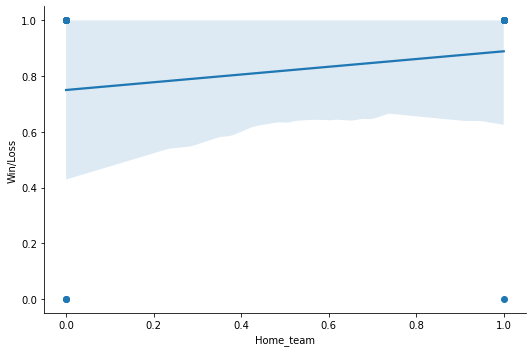

In [20]:
AR = main_df.loc[(main_df['Season'] == 2021) & (main_df['player'] ==  'Aaron Rodgers')]
sns.lmplot(x='Home_team', y='Win/Loss', data= AR, aspect=1.5, scatter_kws={'alpha':1});

In [21]:
AR

,pos,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,...,Roof,Surface,Temperature,Humidity,Wind_Speed,game_date,W_Team,Win/Loss,Season,Home_team
12317,QB,Aaron Rodgers,GNB,19,24,240,4,0,1,3,...,outdoors,grass,32,85,7,2021-01-03,GNB,1.0,2021,0
12823,QB,Aaron Rodgers,GNB,23,36,296,2,0,0,0,...,outdoors,grass,35,69,13,2021-01-16,GNB,1.0,2021,1
12892,QB,Aaron Rodgers,GNB,33,48,346,3,1,5,32,...,outdoors,grass,29,75,10,2021-01-24,TAM,0.0,2021,1
13178,QB,Aaron Rodgers,GNB,15,28,133,0,2,1,11,...,outdoors,grass,86,57,9,2021-09-12,NOR,0.0,2021,0
13724,QB,Aaron Rodgers,GNB,22,27,255,4,0,3,28,...,outdoors,grass,73,84,12,2021-09-20,GNB,1.0,2021,1
14091,QB,Aaron Rodgers,GNB,23,33,261,2,0,1,8,...,outdoors,grass,69,57,15,2021-09-26,GNB,1.0,2021,0
14301,QB,Aaron Rodgers,GNB,20,36,248,2,0,3,12,...,outdoors,grass,67,87,4,2021-10-03,GNB,1.0,2021,1
14615,QB,Aaron Rodgers,GNB,27,39,344,2,1,2,11,...,outdoors,fieldturf,76,67,12,2021-10-10,GNB,1.0,2021,0
14988,QB,Aaron Rodgers,GNB,17,23,195,2,0,3,26,...,outdoors,grass,59,39,6,2021-10-17,GNB,1.0,2021,0
15333,QB,Aaron Rodgers,GNB,27,35,274,3,0,3,27,...,outdoors,grass,49,56,11,2021-10-24,GNB,1.0,2021,1


In [27]:
sns.heatmap(AR)

ValueError: could not convert string to float: 'QB'

In [ ]:
X = AR.loc[:, ~AR.columns.isin(['Team', 'Rank'])]